# 探索性資料分析 Exploratory Data Analysis

## Import Module

In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Load Data

In [3]:
weather = pd.read_csv(f'{os.getcwd()}/data/weatherAUS.csv')

In [4]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
print(f'Shape of DataFrame: {weather.shape}')
print(f'Names of columns of DataFrame: {weather.columns}')

Shape of DataFrame: (145460, 23)
Names of columns of DataFrame: Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

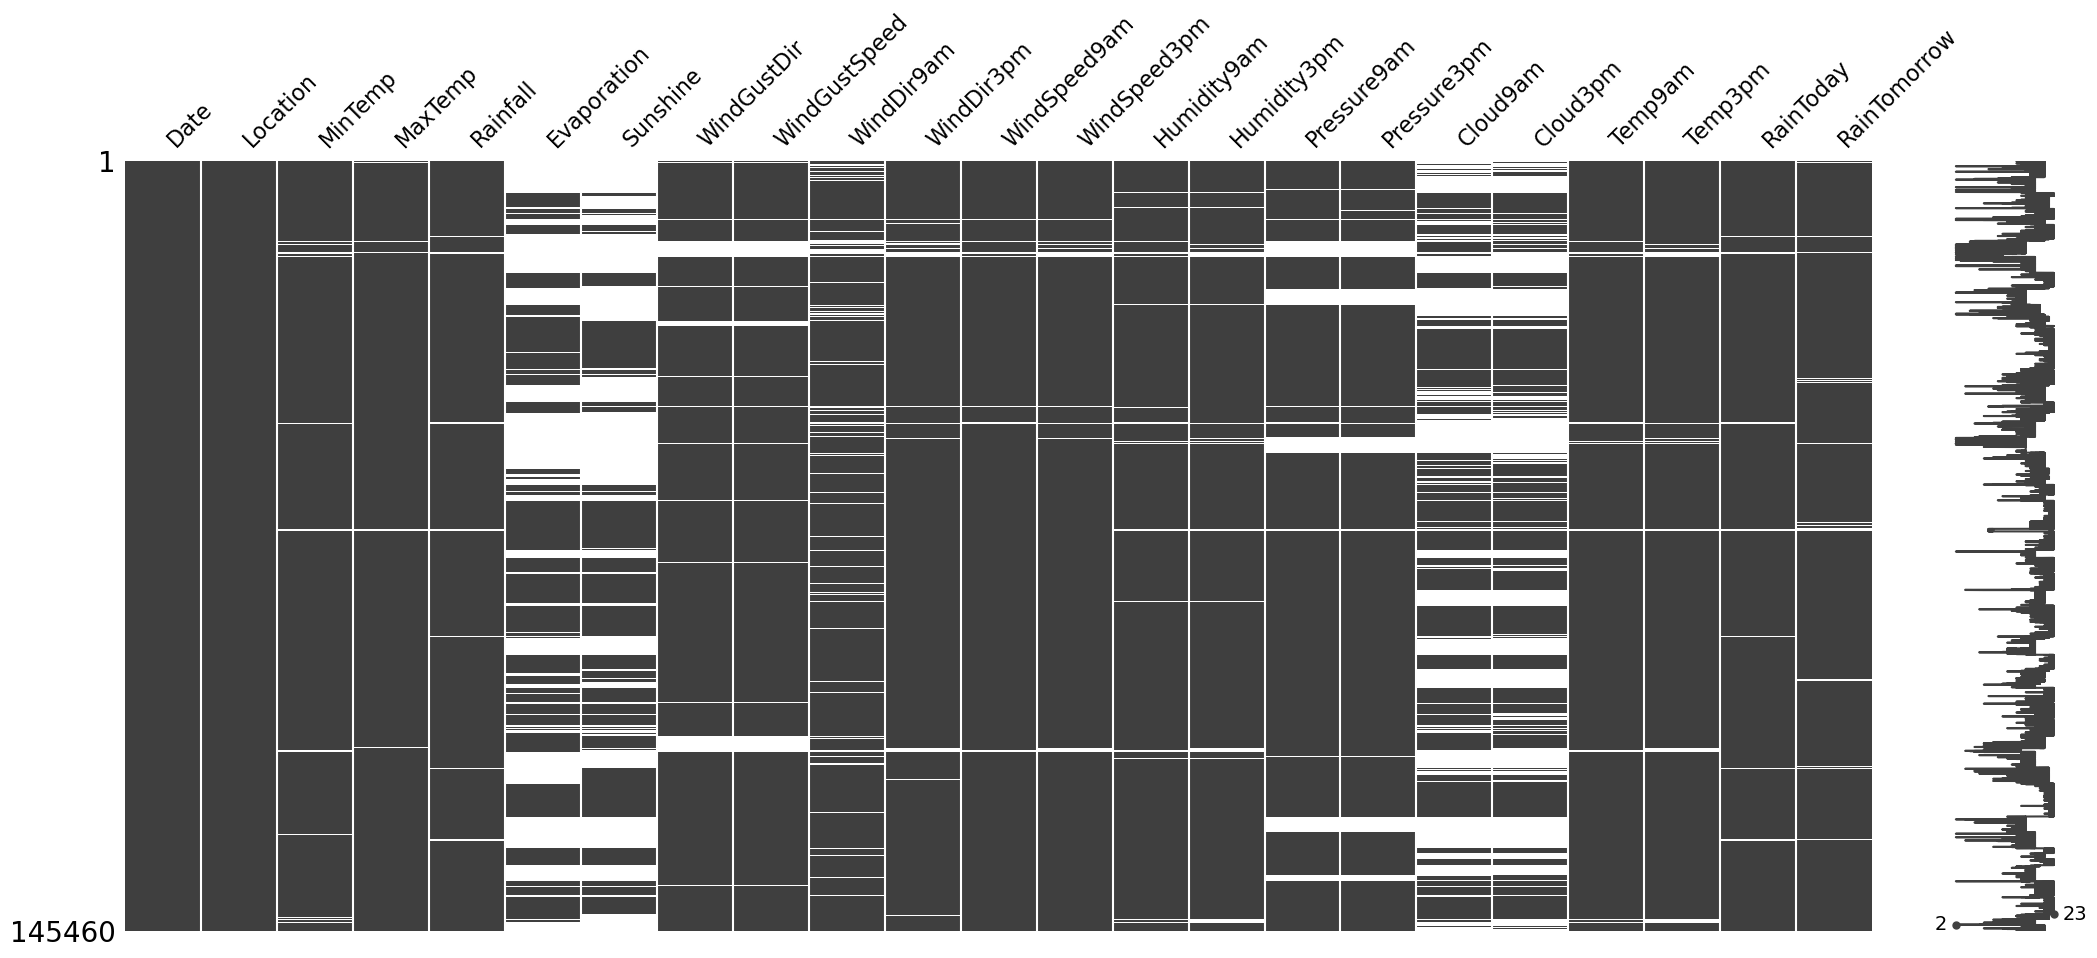

In [6]:
# Get Null values
msno.matrix(weather)
weather.isnull().sum()

In [7]:
# Statistical insights into the dataset
print(weather.describe())

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

## EDA and missing values

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

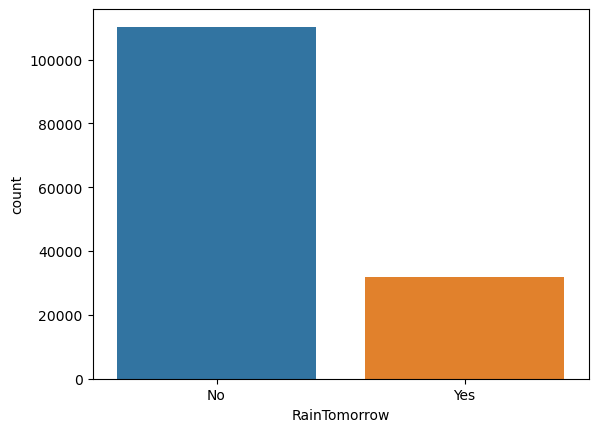

In [8]:
sns.countplot(data=weather, x='RainTomorrow')

In [9]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather['Day'] = weather['Date'].dt.day
weather['Year'] = weather['Date'].dt.year
# Dropping the Date column since day and month have already been extracted as integer values.
weather.drop('Date', axis=1, inplace=True)

# numerical columns
numerical_columns = weather._get_numeric_data().columns
print(f'Numerical columns: {list(numerical_columns)}')

# category columns
categorical_columns = list(set(weather) - set(numerical_columns))
print(f"Categorical columns: {categorical_columns}")

Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Year']
Categorical columns: ['Location', 'WindDir3pm', 'RainTomorrow', 'RainToday', 'WindDir9am', 'WindGustDir']


Text(0.5, 1.0, 'Correlation heatmap')

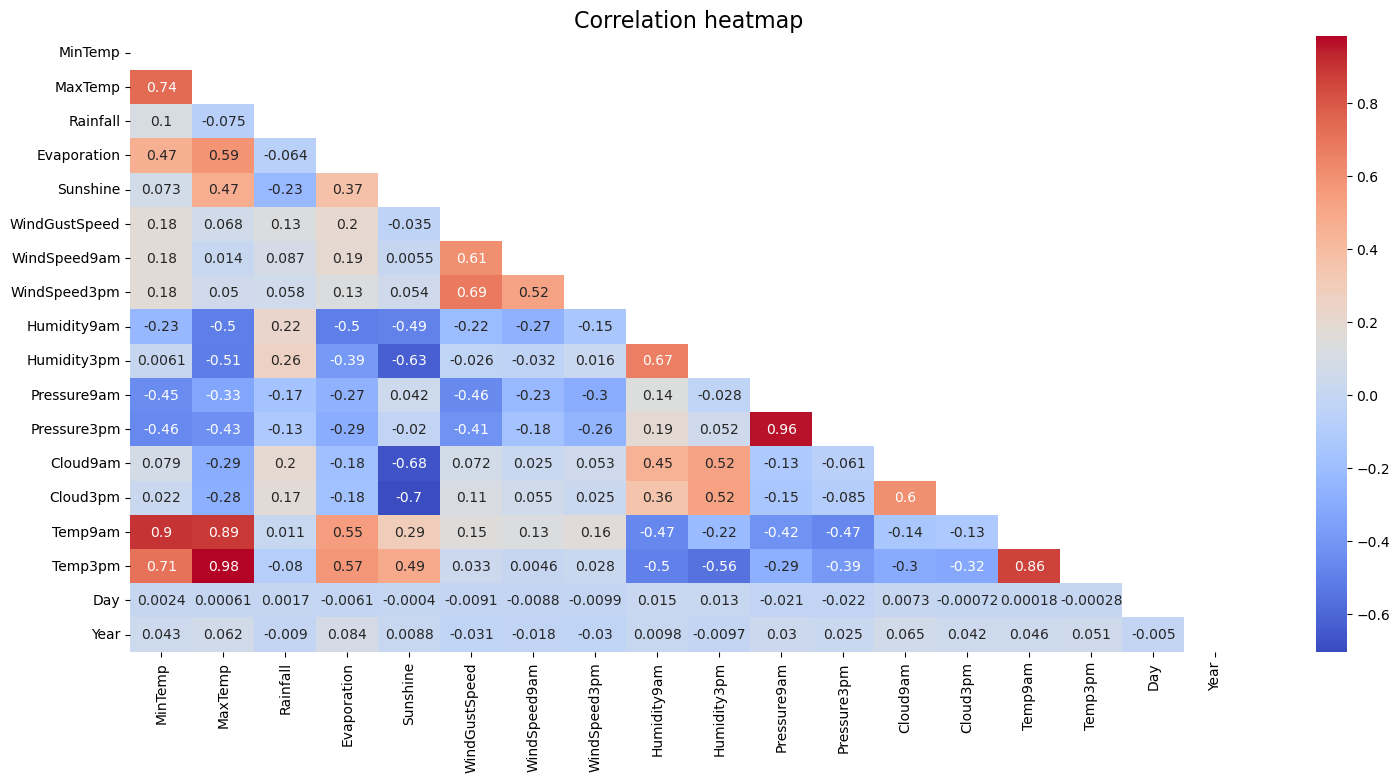

In [10]:
plt.figure(figsize=(18, 8))
mask_1 = np.triu(np.ones_like(weather.corr(), dtype=np.bool))
heatmap = sns.heatmap(weather.corr(), annot=True, cmap='coolwarm', mask=mask_1)
heatmap.set_title('Correlation heatmap', fontdict={'fontsize': 16})

<AxesSubplot:title={'center':'Evaporation over the years'}, xlabel='Evaporation', ylabel='Density'>

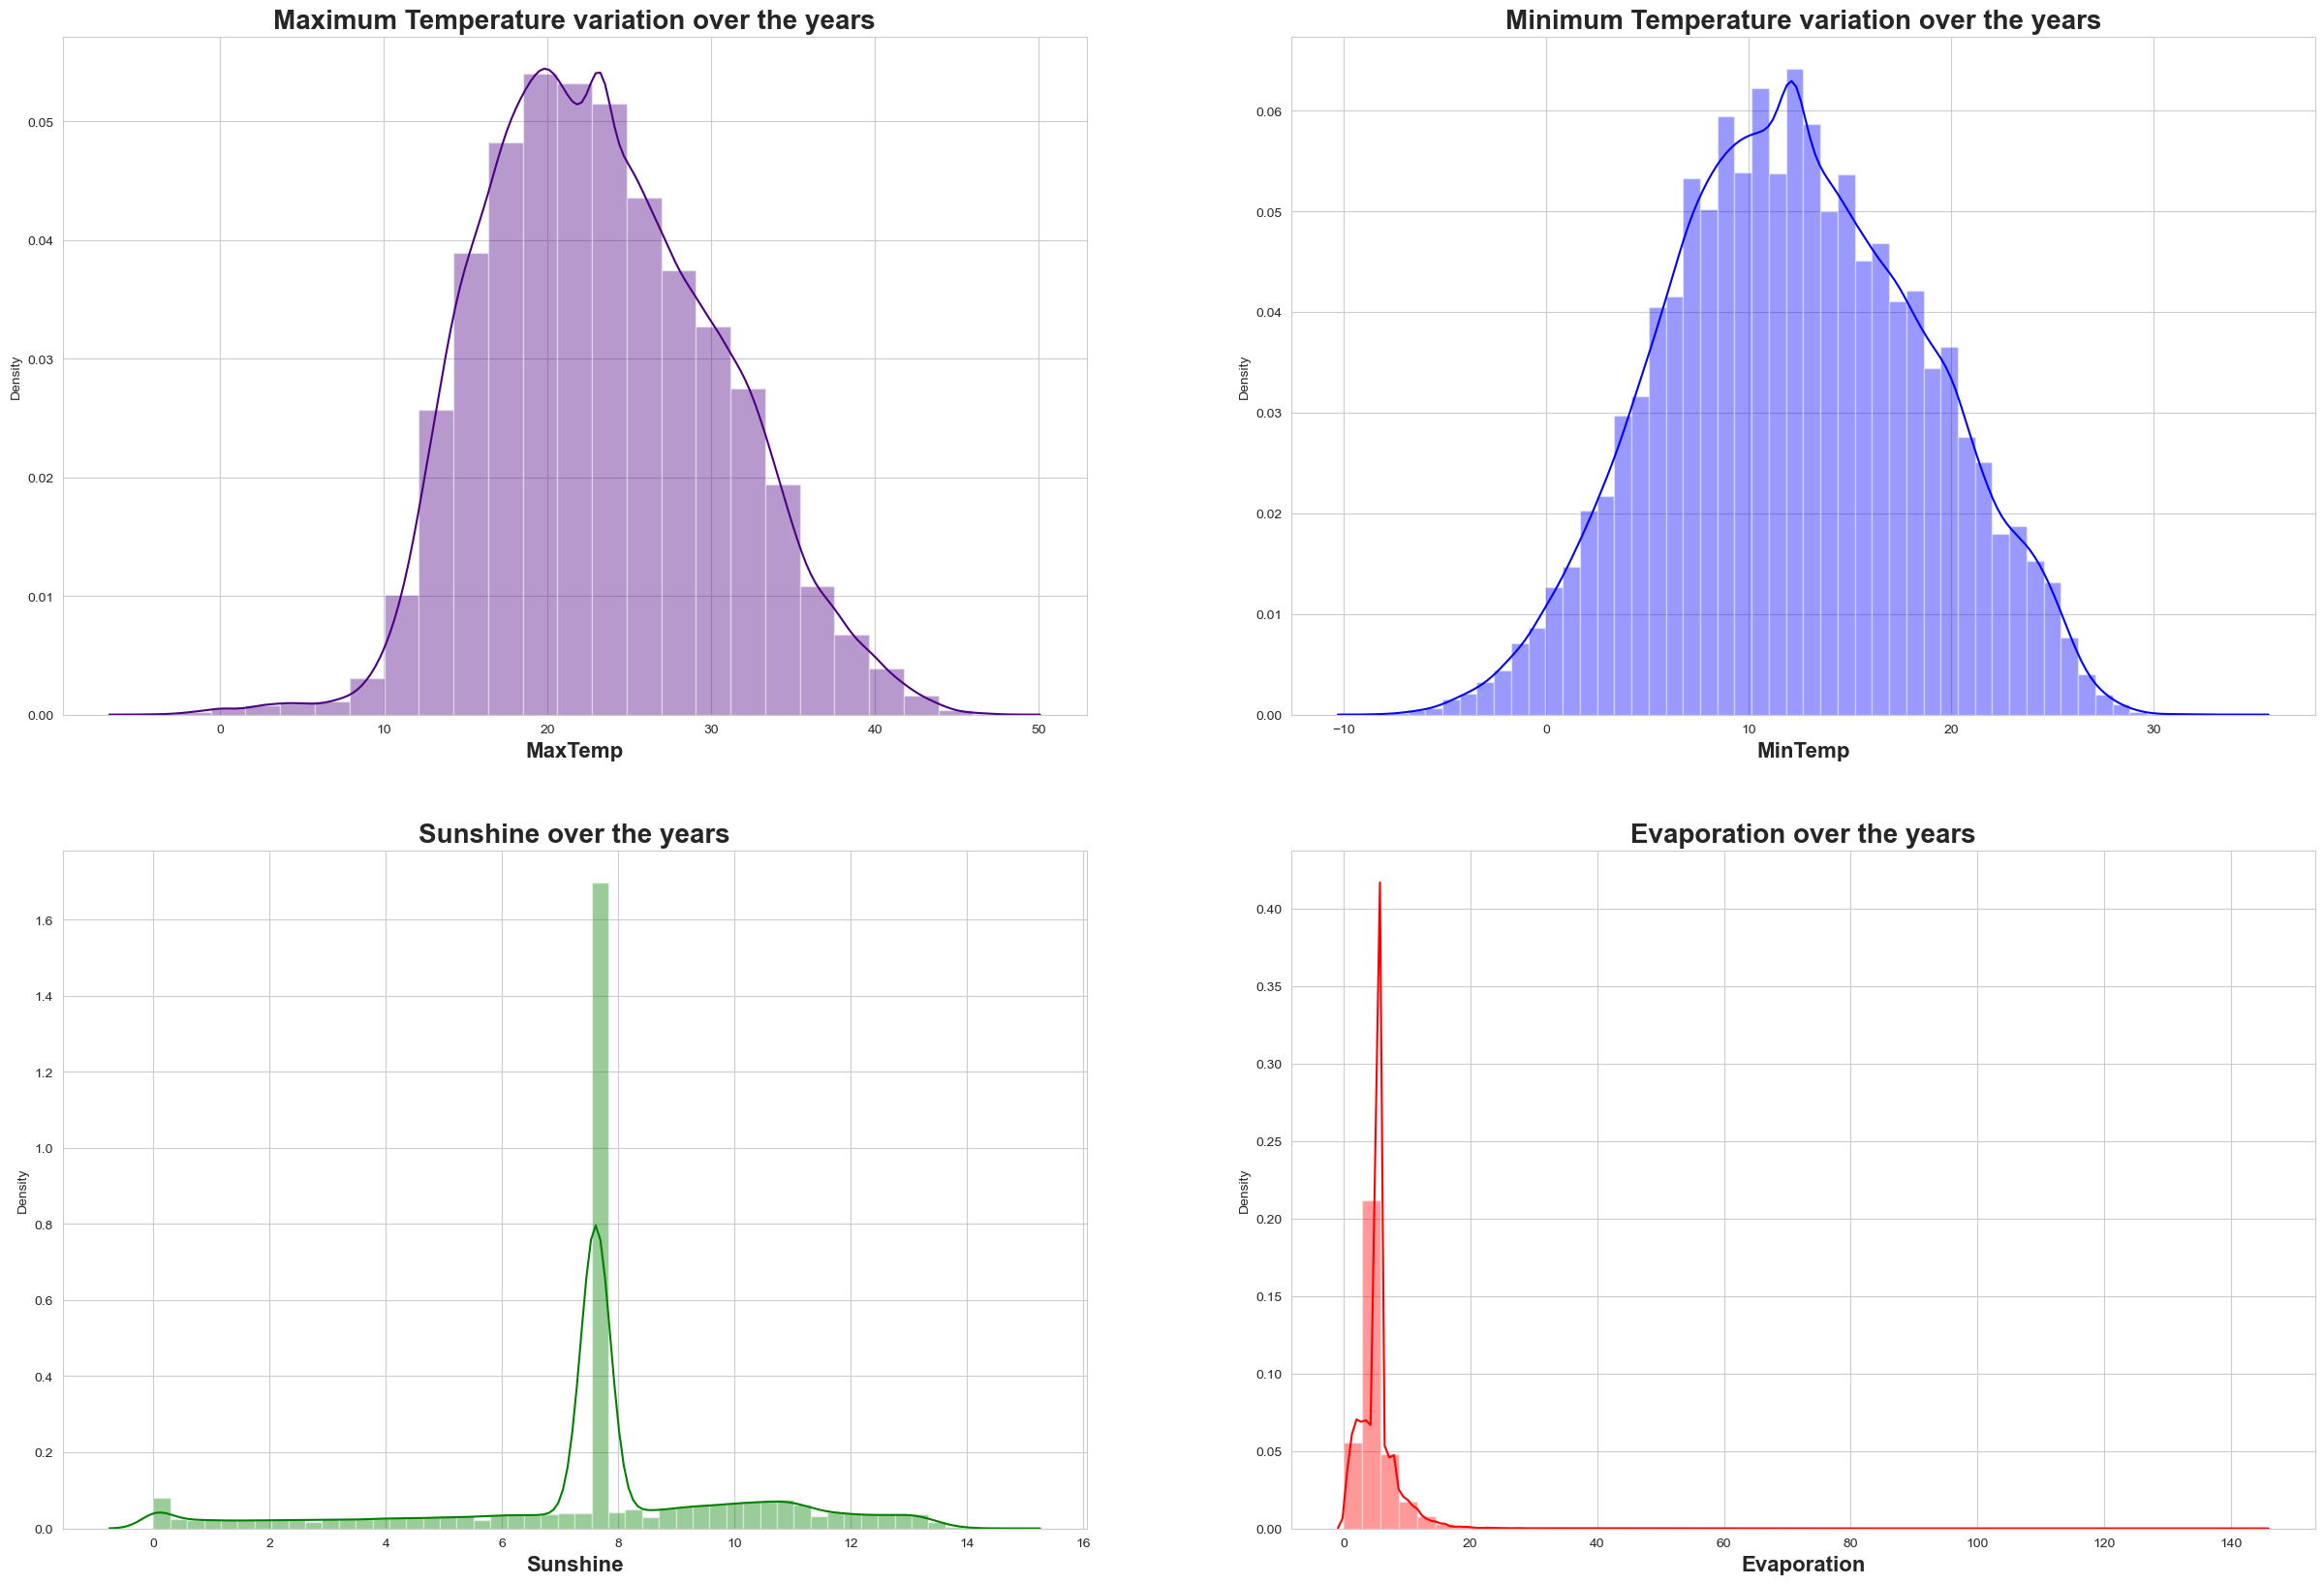

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(30, 20))
sns.set_style('whitegrid')

# Maximum Temperature
plt.subplot(2, 2, 1)
plt.title('Maximum Temperature variation over the years', fontweight='bold', fontsize=20)
plt.xlabel('MaxTemp', fontweight='bold', fontsize=16)
sns.distplot(weather['MaxTemp'], color='indigo', bins=25)

# Minimum Temperature
plt.subplot(2, 2, 2)
plt.title('Minimum Temperature variation over the years', fontweight='bold', fontsize=20)
plt.xlabel('MinTemp', fontweight='bold', fontsize=16)
sns.distplot(weather['MinTemp'], color='blue')

# Sunshine
plt.subplot(2, 2, 3)
plt.title('Sunshine over the years', fontweight='bold', fontsize=20)
plt.xlabel('Sunshine', fontweight='bold', fontsize=16)
sns.distplot(weather['Sunshine'], color='green', bins=50)

# Evaporation 蒸發 
plt.subplot(2, 2, 4)
plt.title('Evaporation over the years', fontweight='bold', fontsize=20)
plt.xlabel('Evaporation', fontweight='bold', fontsize=16)
sns.distplot(weather['Evaporation'], color='red', bins=50)

In [12]:
# Inputing missing value (with mean)
weather['MinTemp'].fillna(weather['MinTemp'].mean(), inplace=True)
weather['MaxTemp'].fillna(weather['MaxTemp'].mean(), inplace=True)
weather['Evaporation'].fillna(weather['Evaporation'].mean(), inplace=True)
weather['Sunshine'].fillna(weather['Sunshine'].mean(), inplace=True)

### Rainfall

The mean rainfall over the years is:  2.3609181499166656


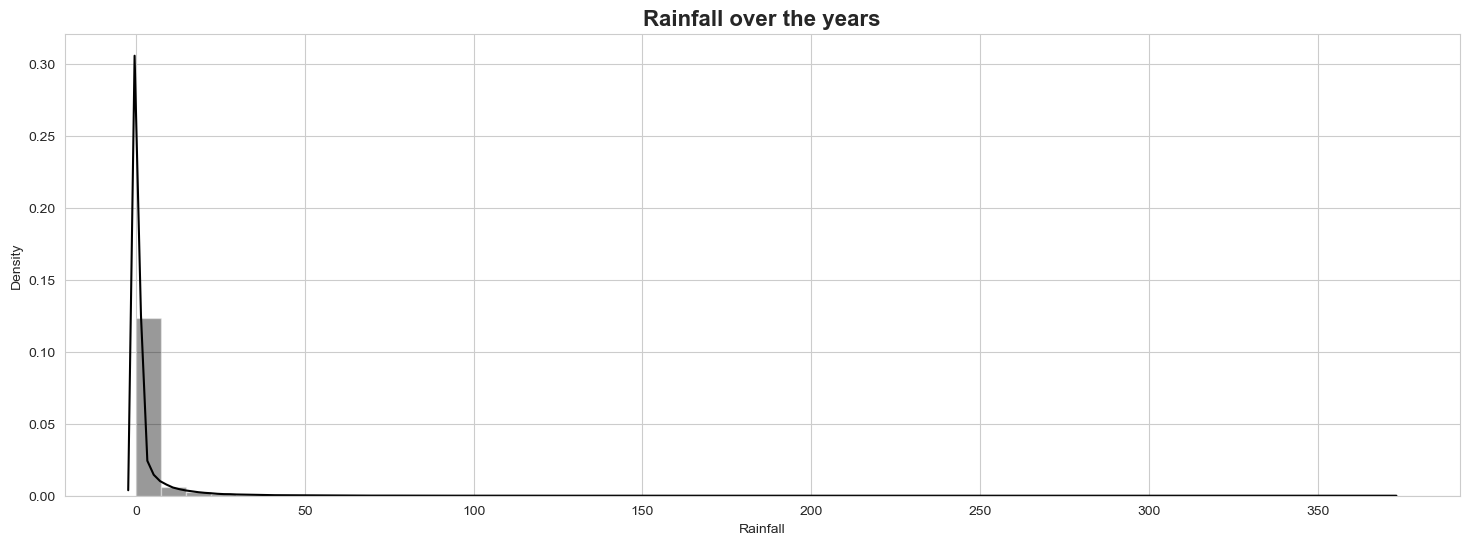

In [13]:
plt.figure(figsize=(18, 6))
sns.distplot(weather['Rainfall'], bins=50, color='black')
plt.title('Rainfall over the years', fontweight='bold', fontsize=16)

print('\033[1m' + 'The mean rainfall over the years is: ', weather['Rainfall'].mean())

In [14]:
# filling missing values
weather['Rainfall'].fillna(weather['Rainfall'].mean(), inplace=True)

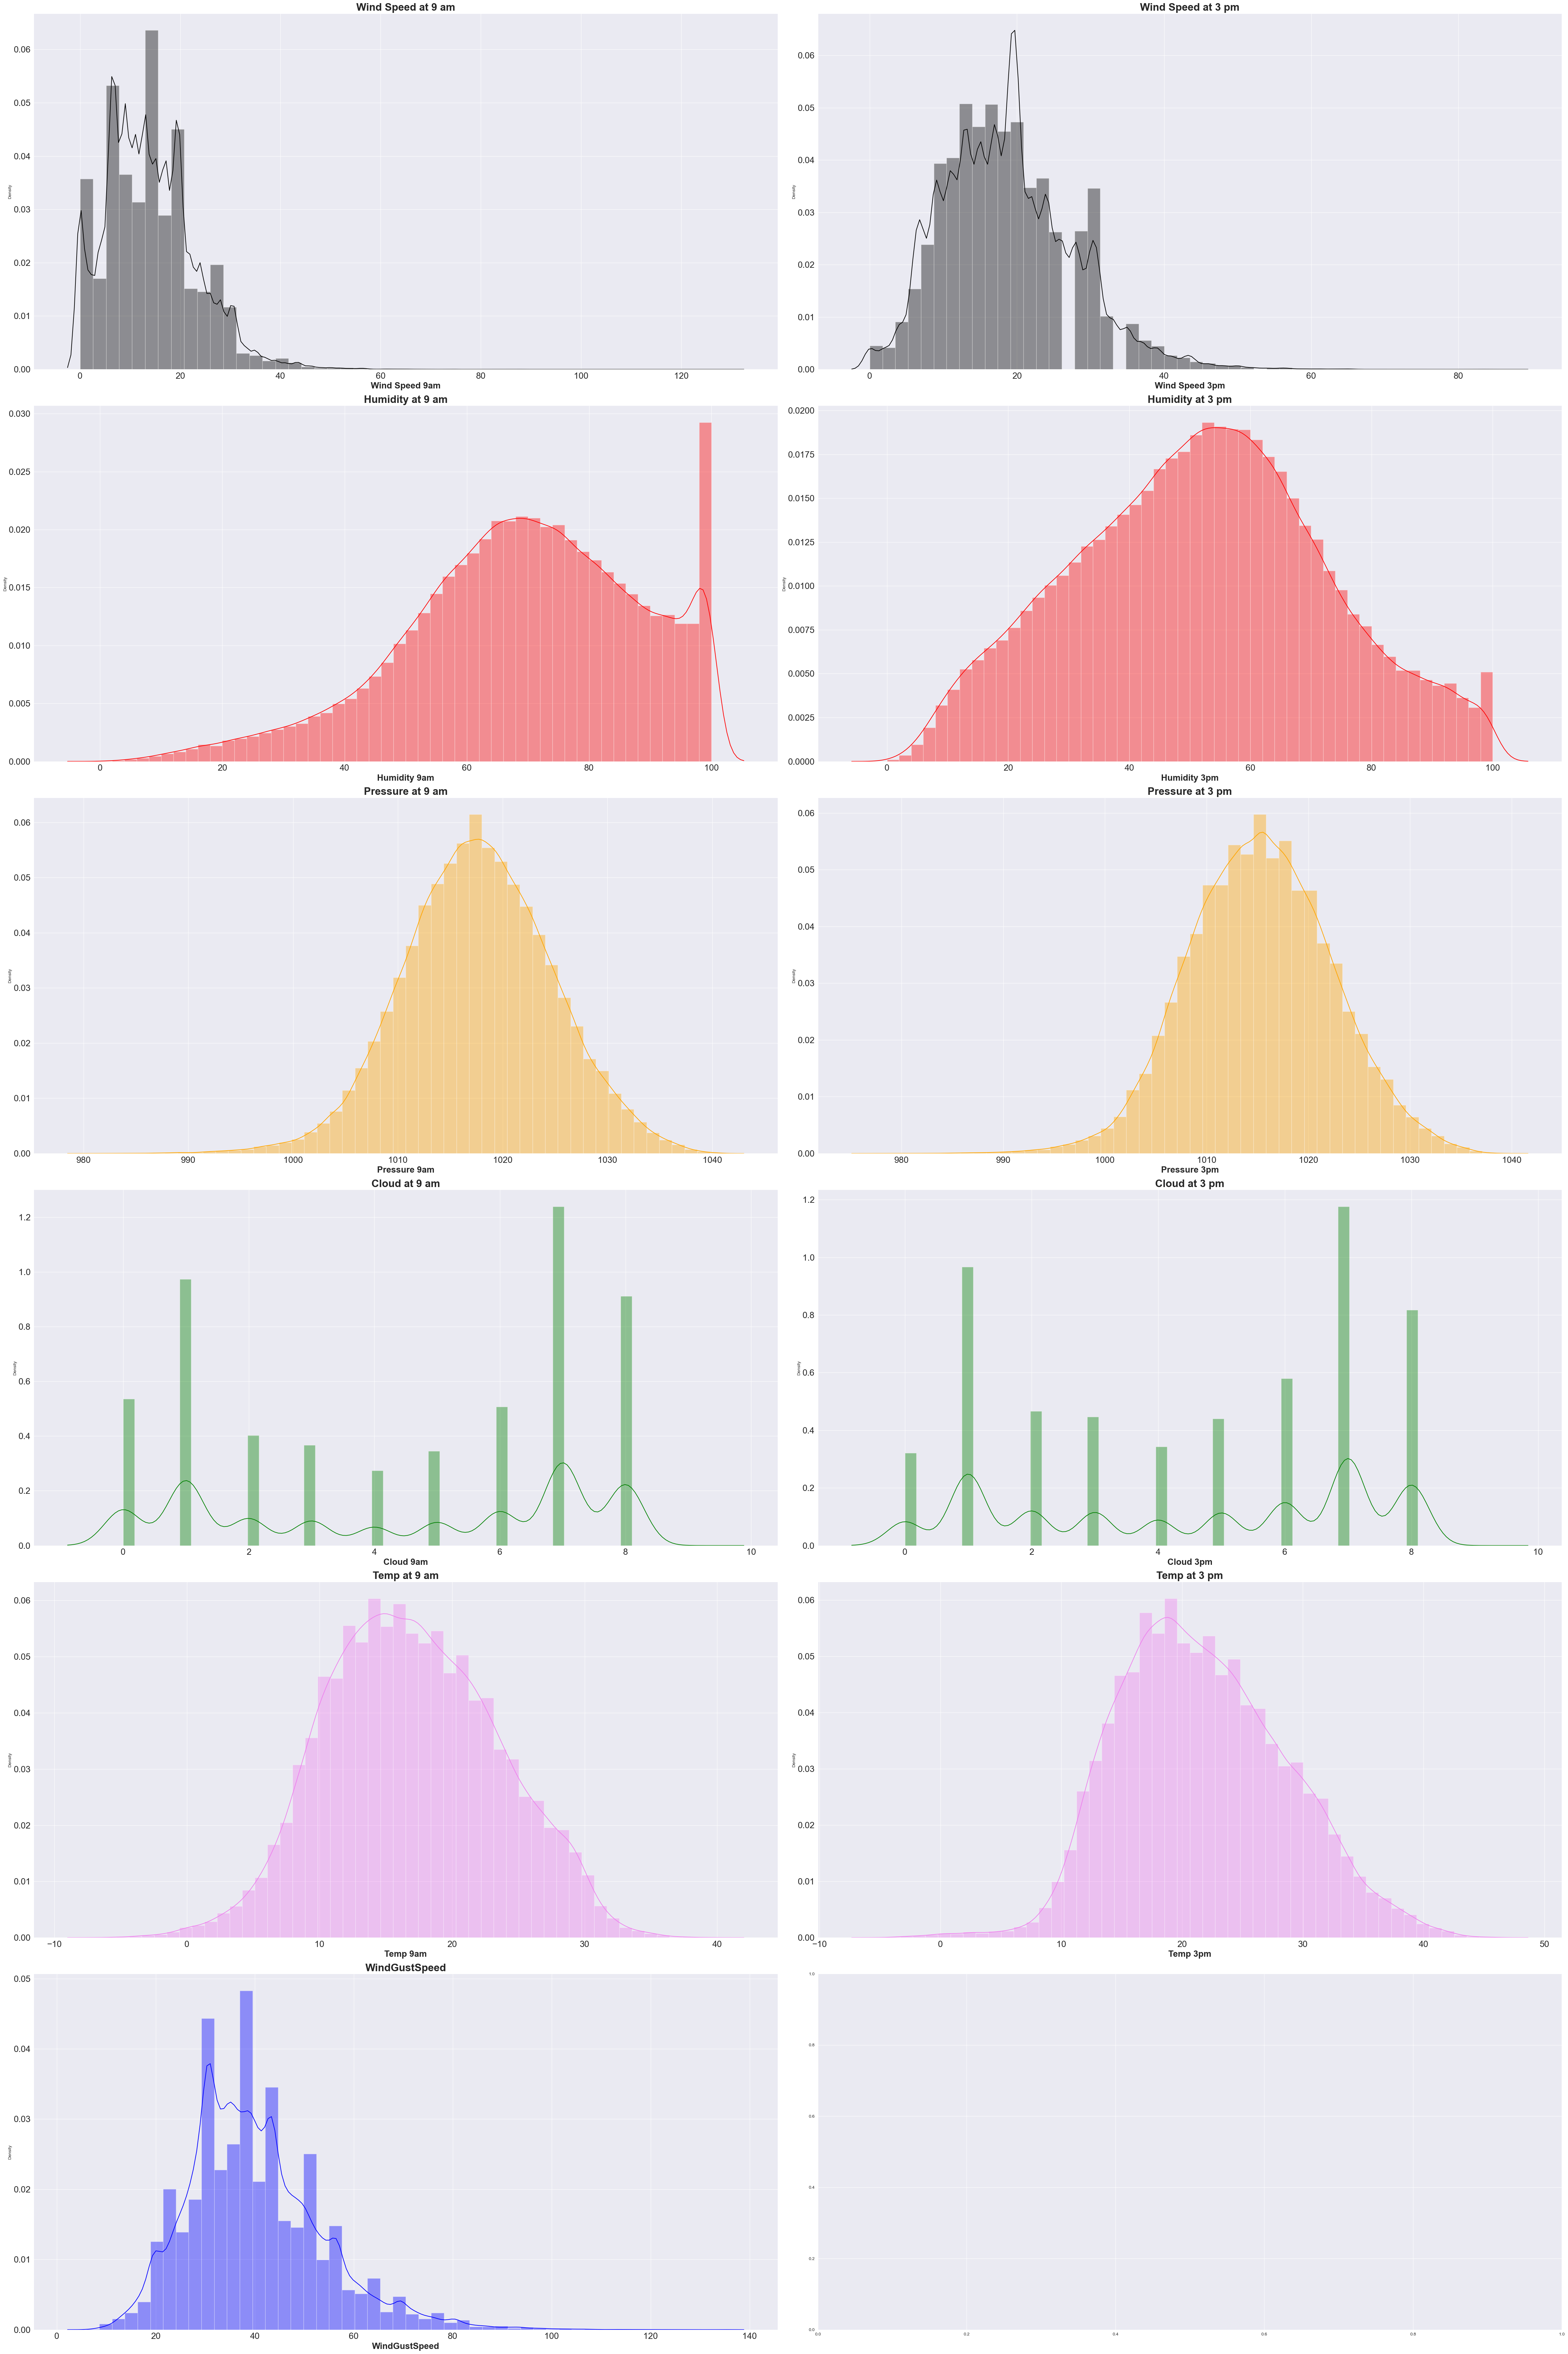

In [25]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(6, 2, figsize=(50, 75))

# WindSpeed9am
plt.subplot(6, 2, 1)
sns.distplot(weather['WindSpeed9am'], bins=50, color='black')
plt.title('Wind Speed at 9 am', fontweight='bold', fontsize=24)
plt.xlabel('Wind Speed 9am', fontweight='bold', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)

# WindSpeed3pm
plt.subplot(6, 2, 2)
sns.distplot(weather['WindSpeed3pm'], bins=50, color='black')
plt.title('Wind Speed at 3 pm', fontweight='bold', fontsize=24)
plt.xlabel('Wind Speed 3pm', fontweight='bold', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)

# Humidity9am
plt.subplot(6, 2, 3)
sns.distplot(weather['Humidity9am'], bins=50, color='red')
plt.title('Humidity at 9 am', fontweight='bold', fontsize=24)
plt.xlabel('Humidity 9am', fontweight='bold', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)

# Humidity3pm
plt.subplot(6, 2, 4)
sns.distplot(weather['Humidity3pm'], bins=50, color='red')
plt.title('Humidity at 3 pm', fontweight='bold', fontsize=24)
plt.xlabel('Humidity 3pm', fontweight='bold', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)

# Pressure9am
plt.subplot(6, 2, 5)
sns.distplot(weather['Pressure9am'], bins=50, color='orange')
plt.title('Pressure at 9 am', fontweight='bold', fontsize=24)
plt.xlabel('Pressure 9am', fontweight='bold', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)

# Pressure3pm
plt.subplot(6, 2, 6)
sns.distplot(weather['Pressure3pm'], bins=50, color='orange')
plt.title('Pressure at 3 pm', fontweight='bold', fontsize=24)
plt.xlabel('Pressure 3pm', fontweight='bold', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)

# Cloud9am
plt.subplot(6, 2, 7)
sns.distplot(weather['Cloud9am'], bins=50, color='green')
plt.title('Cloud at 9 am', fontweight='bold', fontsize=24)
plt.xlabel('Cloud 9am', fontweight='bold', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)

# Cloud3pm
plt.subplot(6, 2, 8)
sns.distplot(weather['Cloud3pm'], bins=50, color='green')
plt.title('Cloud at 3 pm', fontweight='bold', fontsize=24)
plt.xlabel('Cloud 3pm', fontweight='bold', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)

# Temp9am
plt.subplot(6, 2, 9)
sns.distplot(weather['Temp9am'], bins=50, color='violet')
plt.title('Temp at 9 am', fontweight='bold', fontsize=24)
plt.xlabel('Temp 9am', fontweight='bold', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)

# Temp3pm
plt.subplot(6, 2, 10)
sns.distplot(weather['Temp3pm'], bins=50, color='violet')
plt.title('Temp at 3 pm', fontweight='bold', fontsize=24)
plt.xlabel('Temp 3pm', fontweight='bold', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)

# WindGustSpeed
plt.subplot(6, 2, 11)
sns.distplot(weather['WindGustSpeed'], bins=50, color='blue')
plt.title('WindGustSpeed', fontweight='bold', fontsize=24)
plt.xlabel('WindGustSpeed', fontweight='bold', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)

plt.tight_layout()